### Task 1 - Build Four Graph Variants
Using **the same base graph structure as in your written homework (the manual DFS/DFS exercise)**, construct:

- Weighted Directed graph
- Weighted Undirected graph
- Unweighted Undirected graph
- Unweighted Directed graph


In [19]:
from graph_factory import GraphFactory

edges_weighted = [
    (0, 1, 2.0), (0, 2, 3.0),
    (1, 3, 1.0),
    (2, 3, 4.0), (2, 4, 2.0),
    (3, 4, 5.0), (3, 5, 1.0),
    (4, 5, 2.0)
]
edges_unweighted = [
    (0, 1, 1.0), (0, 2, 1.0),
    (1, 3, 1.0),
    (2, 3, 1.0), (2, 4, 1.0),
    (3, 4, 1.0), (3, 5, 1.0),
    (4, 5, 1.0)
]

weighted_directed = GraphFactory.from_edges(6, edges_weighted, directed=True)
weighted_undirected = GraphFactory.from_edges(6, edges_weighted, directed=False)
unweighted_directed = GraphFactory.from_edges(6, edges_unweighted, directed=True)
unweighted_undirected = GraphFactory.from_edges(6, edges_unweighted, directed=False)

# Used Copilot for prettier output
for g, name in [
    (weighted_directed, "Weighted Directed"),
    (weighted_undirected, "Weighted Undirected"),
    (unweighted_directed, "Unweighted Directed"),
    (unweighted_undirected, "Unweighted Undirected")
]:
    print(f"\n{name} Graph:")
    print("Adjacency List:")
    for v in range(g.vertices):
        print(f"  {v}: {g.get_adjacency_list()[v]}")


Weighted Directed Graph:
Adjacency List:
  0: [(1, 2.0), (2, 3.0)]
  1: [(3, 1.0)]
  2: [(3, 4.0), (4, 2.0)]
  3: [(4, 5.0), (5, 1.0)]
  4: [(5, 2.0)]
  5: []

Weighted Undirected Graph:
Adjacency List:
  0: [(1, 2.0), (2, 3.0)]
  1: [(0, 2.0), (3, 1.0)]
  2: [(0, 3.0), (3, 4.0), (4, 2.0)]
  3: [(1, 1.0), (2, 4.0), (4, 5.0), (5, 1.0)]
  4: [(2, 2.0), (3, 5.0), (5, 2.0)]
  5: [(3, 1.0), (4, 2.0)]

Unweighted Directed Graph:
Adjacency List:
  0: [(1, 1.0), (2, 1.0)]
  1: [(3, 1.0)]
  2: [(3, 1.0), (4, 1.0)]
  3: [(4, 1.0), (5, 1.0)]
  4: [(5, 1.0)]
  5: []

Unweighted Undirected Graph:
Adjacency List:
  0: [(1, 1.0), (2, 1.0)]
  1: [(0, 1.0), (3, 1.0)]
  2: [(0, 1.0), (3, 1.0), (4, 1.0)]
  3: [(1, 1.0), (2, 1.0), (4, 1.0), (5, 1.0)]
  4: [(2, 1.0), (3, 1.0), (5, 1.0)]
  5: [(3, 1.0), (4, 1.0)]


### Task 2 - Apply Algorithms (BFS, DFS, Components, Stats)
After you implement the TODO's in algorithmics.py and the required representations in graph_abc.py:

For unweighted directed and undirected graphs:
1. Run BFS from a chosen start vertex (note your choice).
2. Run DFS from the same start vertex.
3. Compute connected components:
    - For undirected graphs: standard components.
    - For directed graphs: weakly connected components (ignore directions).

4. Compute component statistics: for each component, report
    - vertices (sorted),
    - node_count,
    - edge_count (count undirected edges once; count directed edges with both endpoints in the component),
    - smallest_vertex

In [20]:
from algorithmics import GraphAlgorithms

start_vertex = 0 

def analyze_graph(graph, name):
    print(f"\n{name} Graph")
    print(f"Start vertex: {start_vertex}")
    
    bfs_order = GraphAlgorithms.bfs(graph, start_vertex)
    print(f"BFS order: {bfs_order}")
    
    dfs_order = GraphAlgorithms.dfs(graph, start_vertex)
    print(f"DFS order: {dfs_order}")
    
    print()
    components = GraphAlgorithms.connected_components(graph)
    print(f"Connected components ({len(components)}):")
    for i, comp in enumerate(components):
        print(f"Component {i+1}: {comp}")
    
    print()
    # Copilot assisted prettier prints again
    stats = GraphAlgorithms.components_with_stats(graph)
    print("Stats:")
    for i, stat in enumerate(stats):
        print(f"Component {i+1}:")
        print(f"Vertices: {stat['vertices']}")
        print(f"Node count: {stat['node_count']}")
        print(f"Edge count: {stat['edge_count']}")
        print(f"Smallest vertex: {stat['smallest_vertex']}")

analyze_graph(unweighted_directed, "Unweighted Directed")
analyze_graph(unweighted_undirected, "Unweighted Undirected")


Unweighted Directed Graph
Start vertex: 0
BFS order: [0, 1, 2, 3, 4, 5]
DFS order: [0, 1, 3, 4, 5, 2]

Connected components (1):
Component 1: [0, 1, 2, 3, 4, 5]

Stats:
Component 1:
Vertices: [0, 1, 2, 3, 4, 5]
Node count: 6
Edge count: 8
Smallest vertex: 0

Unweighted Undirected Graph
Start vertex: 0
BFS order: [0, 1, 2, 3, 4, 5]
DFS order: [0, 1, 3, 2, 4, 5]

Connected components (1):
Component 1: [0, 1, 2, 3, 4, 5]

Stats:
Component 1:
Vertices: [0, 1, 2, 3, 4, 5]
Node count: 6
Edge count: 8
Smallest vertex: 0


### Task 3 - Visualize One Graph with NetworkX
Pick any one of the four graphs (the most interesting one) and draw it using NetworkX.

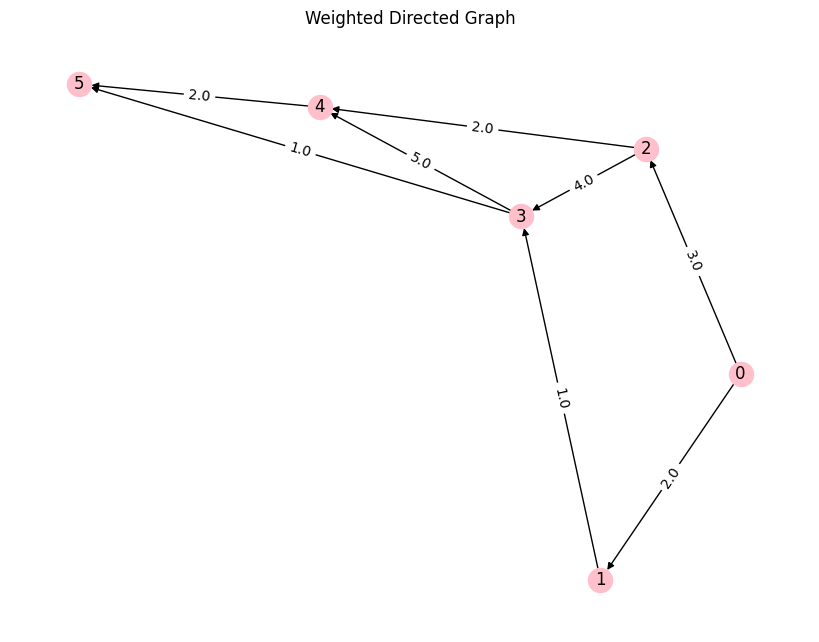

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(range(weighted_directed.vertices))
adj_list = weighted_directed.get_adjacency_list()

for u in range(weighted_directed.vertices):
    for v, weight in adj_list[u]:
        G.add_edge(u, v, weight=weight)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=30)
nx.draw(G, pos, with_labels=True, node_color='pink')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Weighted Directed Graph")
plt.show()
